In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
#Uppgift 1
customer_data = pd.read_csv("customerdata4.csv")
customer_data.head()
#Laddar in datan samt ger oss en överblick av datan

,CustomerID,Gender,Age,Annual Income (10kkr),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customer_data.describe()
#Ta fram statestik så som medelvärde, standardavvikelse, min, max etc.

,CustomerID,Age,Annual Income (10kkr),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


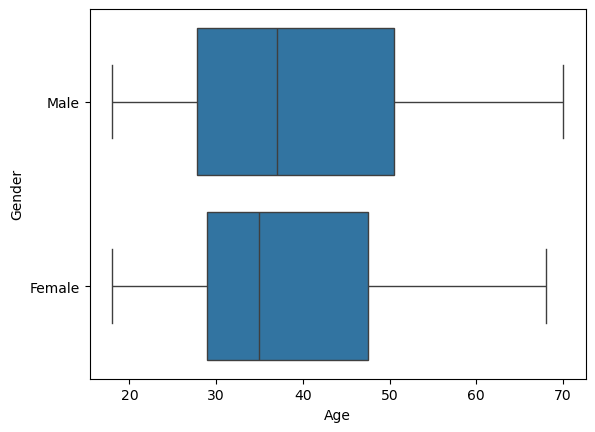

In [4]:
import seaborn as sns
#Uppgift 2
sns.boxplot(data=customer_data, x="Age", y="Gender")
plt.show()
#Boxplot för att se åldersfördelningen mellan könen

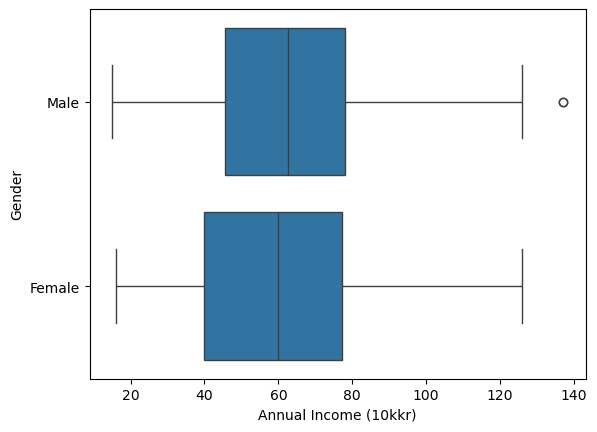

In [5]:
import seaborn as sns

sns.boxplot(data=customer_data, x="Annual Income (10kkr)", y="Gender")
plt.show()
#Boxplot för att se inkomstfördelningen mellan könen

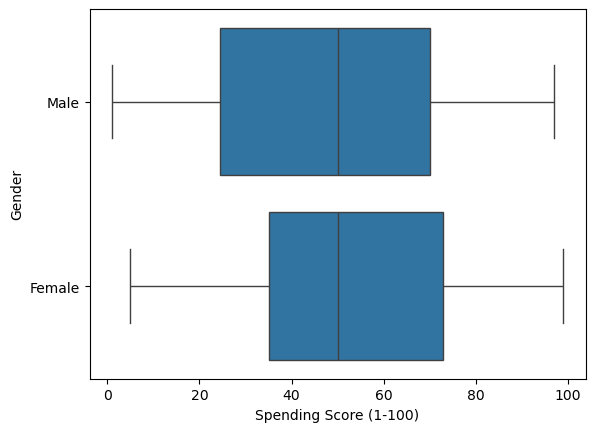

In [6]:
import seaborn as sns

sns.boxplot(data=customer_data, x="Spending Score (1-100)", y="Gender")
plt.show()
#Boxplot för att se spending score-fördelningen mellan könen

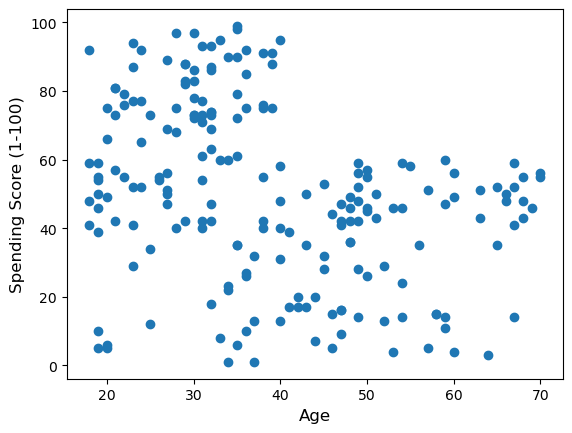

In [7]:
#Uppgift 3
# Bivariate analysis
plt.scatter(customer_data.iloc[:,2].values, customer_data.iloc[:,4].values)
plt.xlabel("Age", size=12)
plt.ylabel("Spending Score (1-100)", size=12)
plt.show() #Scatter plot of Age vs Spending Score, för att visualisera datan innan klustring
#för att SE hur Age & Spending Score fördelar sig innan du klustrar.
#Visar vart alla punkter ligger i förhållande till varandra.

In [8]:
point=customer_data[['Age', 'Spending Score (1-100)']].values
#Början av elbow method för att hitta optimalt antal kluster

In [9]:
# data assignment
xCoord = (point[:,0])
yCoord = (point[:,1])
print(xCoord)
print(yCoord)

[19 21 20 23 31 22 35 23 64 30 67 35 58 24 37 22 35 20 52 35 35 25 46 31
 54 29 45 35 40 23 60 21 53 18 49 21 42 30 36 20 65 24 48 31 49 24 50 27
 29 31 49 33 31 59 50 47 51 69 27 53 70 19 67 54 63 18 43 68 19 32 70 47
 60 60 59 26 45 40 23 49 57 38 67 46 21 48 55 22 34 50 68 18 48 40 32 24
 47 27 48 20 23 49 67 26 49 21 66 54 68 66 65 19 38 19 18 19 63 49 51 50
 27 38 40 39 23 31 43 40 59 38 47 39 25 31 20 29 44 32 19 35 57 32 28 32
 25 28 48 32 34 34 43 39 44 38 47 27 37 30 34 30 56 29 19 31 50 36 42 33
 36 32 40 28 36 36 52 30 58 27 59 35 37 32 46 29 41 30 54 28 41 36 34 32
 33 38 47 35 45 32 32 30]
[39 81  6 77 40 76  6 94  3 72 14 99 15 77 13 79 35 66 29 98 35 73  5 73
 14 82 32 61 31 87  4 73  4 92 14 81 17 73 26 75 35 92 36 61 28 65 55 47
 42 42 52 60 54 60 45 41 50 46 51 46 56 55 52 59 51 59 50 48 59 47 55 42
 49 56 47 54 53 48 52 42 51 55 41 44 57 46 58 55 60 46 55 41 49 40 42 52
 47 50 42 49 41 48 59 55 56 42 50 46 43 48 52 54 42 46 48 50 43 59 43 57
 56 40 58 91 29 77 35 95 

In [10]:
X = np.stack((xCoord,yCoord), axis=1)
print(X)
#Skapar en tvådimensionell array med x och y koordinaterna

[[19 39]
 [21 81]
 [20  6]
 [23 77]
 [31 40]
 [22 76]
 [35  6]
 [23 94]
 [64  3]
 [30 72]
 [67 14]
 [35 99]
 [58 15]
 [24 77]
 [37 13]
 [22 79]
 [35 35]
 [20 66]
 [52 29]
 [35 98]
 [35 35]
 [25 73]
 [46  5]
 [31 73]
 [54 14]
 [29 82]
 [45 32]
 [35 61]
 [40 31]
 [23 87]
 [60  4]
 [21 73]
 [53  4]
 [18 92]
 [49 14]
 [21 81]
 [42 17]
 [30 73]
 [36 26]
 [20 75]
 [65 35]
 [24 92]
 [48 36]
 [31 61]
 [49 28]
 [24 65]
 [50 55]
 [27 47]
 [29 42]
 [31 42]
 [49 52]
 [33 60]
 [31 54]
 [59 60]
 [50 45]
 [47 41]
 [51 50]
 [69 46]
 [27 51]
 [53 46]
 [70 56]
 [19 55]
 [67 52]
 [54 59]
 [63 51]
 [18 59]
 [43 50]
 [68 48]
 [19 59]
 [32 47]
 [70 55]
 [47 42]
 [60 49]
 [60 56]
 [59 47]
 [26 54]
 [45 53]
 [40 48]
 [23 52]
 [49 42]
 [57 51]
 [38 55]
 [67 41]
 [46 44]
 [21 57]
 [48 46]
 [55 58]
 [22 55]
 [34 60]
 [50 46]
 [68 55]
 [18 41]
 [48 49]
 [40 40]
 [32 42]
 [24 52]
 [47 47]
 [27 50]
 [48 42]
 [20 49]
 [23 41]
 [49 48]
 [67 59]
 [26 55]
 [49 56]
 [21 42]
 [66 50]
 [54 46]
 [68 43]
 [66 48]
 [65 52]
 

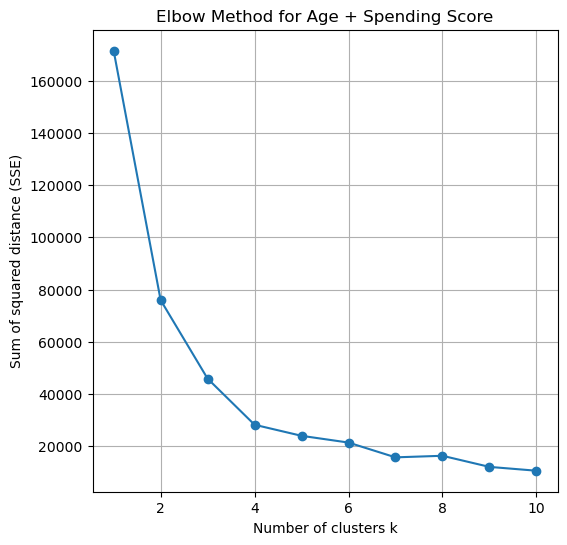

In [11]:
from sklearn.cluster import KMeans
sse = []
k_list = range(1, 11)

for k in k_list:
    km_model = KMeans(n_clusters=k)
    km_model.fit(X)
    sse.append(km_model.inertia_)


plt.figure(figsize=(6, 6))
plt.plot(k_list, sse, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distance (SSE)')
plt.title('Elbow Method for Age + Spending Score')
plt.grid(True)
plt.show()
#Skapar elbow plot för att hitta optimalt antal kluster

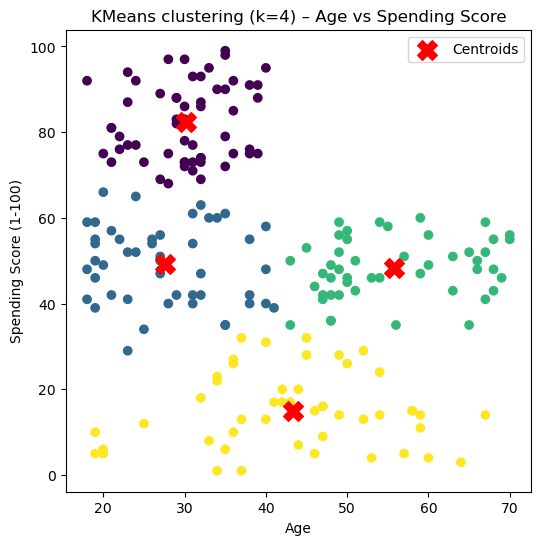

In [12]:
k_final = 4  # change if your elbow suggests a different number
#Utifrån elbow method, välj optimalt antal kluster vilket i detta fall är 4 kluster

kmeans_final = KMeans(n_clusters=k_final, init='k-means++')
labels = kmeans_final.fit_predict(X)
centers = kmeans_final.cluster_centers_

#Skapar scatterplot med centroiderna markerade
#KMeans klustring med det optimala antalet kluster från elbow method
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title(f"KMeans clustering (k={k_final}) – Age vs Spending Score")
plt.legend()
plt.show()


In [13]:
clustered = customer_data.copy()
clustered["cluster"] = labels

clustered.groupby("cluster")[["Age", "Spending Score (1-100)"]].mean()
#Har grupperat datan efter kluster och tagit fram medelvärdet för Age & Spending Score i varje kluster

,Age,Spending Score (1-100)
cluster,,
0,30.175439,82.350877
1,27.617021,49.148936
2,55.708333,48.229167
3,43.291667,15.020833


In [14]:
#uppgift 4, samma principer som i uppgift 3 se dem kommentarerna för att få förklaring
point=customer_data[['Annual Income (10kkr)', 'Spending Score (1-100)']].values #cell 1

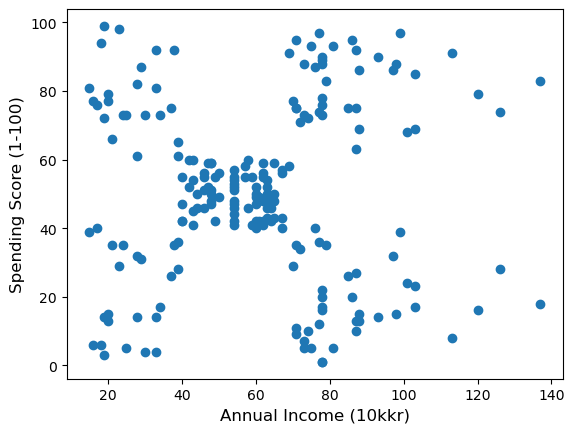

In [15]:
plt.scatter(customer_data.iloc[:,3].values, customer_data.iloc[:,4].values)
plt.xlabel("Annual Income (10kkr)", size=12)
plt.ylabel("Spending Score (1-100)", size=12)
plt.show() #cell 2

In [16]:
point=customer_data[['Annual Income (10kkr)', 'Spending Score (1-100)']].values

In [17]:
# data assignment
xCoord = (point[:,0])
yCoord = (point[:,1])
print(xCoord)
print(yCoord)

[ 15  15  16  16  17  17  18  18  19  19  19  19  20  20  20  20  21  21
  23  23  24  24  25  25  28  28  28  28  29  29  30  30  33  33  33  33
  34  34  37  37  38  38  39  39  39  39  40  40  40  40  42  42  43  43
  43  43  44  44  46  46  46  46  47  47  48  48  48  48  48  48  49  49
  50  50  54  54  54  54  54  54  54  54  54  54  54  54  57  57  58  58
  59  59  60  60  60  60  60  60  61  61  62  62  62  62  62  62  63  63
  63  63  63  63  64  64  65  65  65  65  67  67  67  67  69  69  70  70
  71  71  71  71  71  71  72  72  73  73  73  73  74  74  75  75  76  76
  77  77  77  77  78  78  78  78  78  78  78  78  78  78  78  78  79  79
  81  81  85  85  86  86  87  87  87  87  87  87  88  88  88  88  93  93
  97  97  98  98  99  99 101 101 103 103 103 103 113 113 120 120 126 126
 137 137]
[39 81  6 77 40 76  6 94  3 72 14 99 15 77 13 79 35 66 29 98 35 73  5 73
 14 82 32 61 31 87  4 73  4 92 14 81 17 73 26 75 35 92 36 61 28 65 55 47
 42 42 52 60 54 60 45 41 50 46 51 46 56 5

In [18]:
X = np.stack((xCoord,yCoord), axis=1)
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

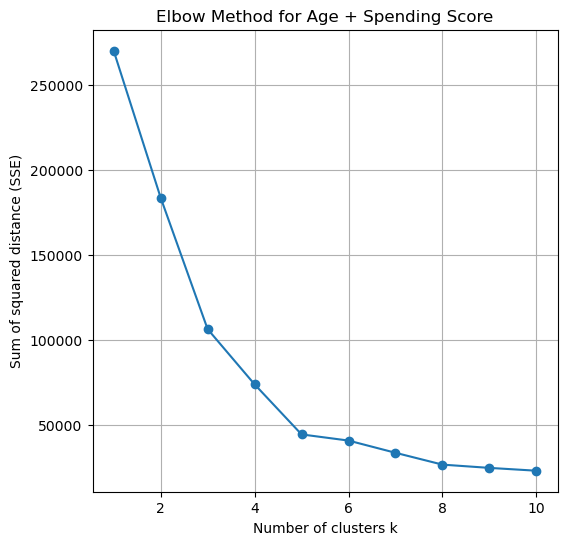

In [19]:
from sklearn.cluster import KMeans
sse = []
k_list = range(1, 11)

for k in k_list:
    km_model = KMeans(n_clusters=k, random_state=42)
    km_model.fit(X)
    sse.append(km_model.inertia_)


plt.figure(figsize=(6, 6))
plt.plot(k_list, sse, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distance (SSE)')
plt.title('Elbow Method for Age + Spending Score')
plt.grid(True)
plt.show()

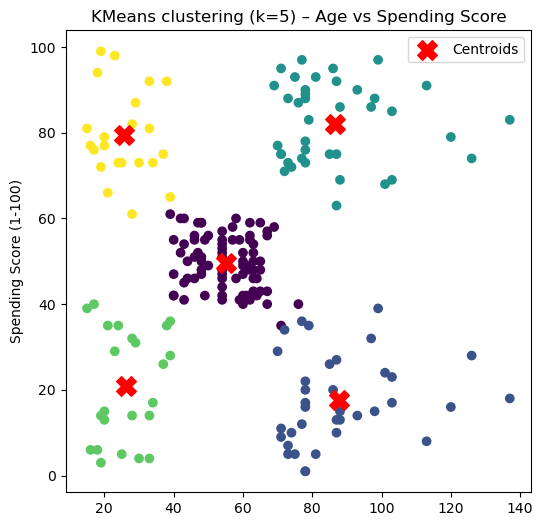

In [20]:
k = 5 # Nu anvönder vi 5 kluster baserat på elbow method,förklaras mer i videon.

kmeans_final = KMeans(n_clusters=k, init='k-means++')
labels = kmeans_final.fit_predict(X)
centers = kmeans_final.cluster_centers_

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("")
plt.ylabel("Spending Score (1-100)")
plt.title(f"KMeans clustering (k={k}) – Age vs Spending Score")
plt.legend()
plt.show()


In [21]:
clustered = customer_data.copy()
clustered["cluster"] = labels

clustered.groupby("cluster")[["Annual Income (10kkr)", "Spending Score (1-100)"]].mean()

,Annual Income (10kkr),Spending Score (1-100)
cluster,,
0,55.087500,49.712500
1,87.750000,17.583333
2,86.538462,82.128205
3,26.304348,20.913043
4,25.727273,79.363636
